# Data Preprocessing

In [1]:
#all the librarys used in this project
import pandas as pd
import numpy as np

import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import preprocessing

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
 
from IPython.display import Image 
#import pydotplus
import graphviz
from six import StringIO

import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO 

from pydot import graph_from_dot_data
from sklearn.utils import resample



from sklearn.tree import export_graphviz
import pydot
import random
import multiprocessing
cpn_cnt = multiprocessing.cpu_count()

%matplotlib inline

In [2]:
df = pd.read_excel("Mid_Term Exam_Supervised Learning.xlsx") # uploading data set

In [3]:
df.head()#top 5 rows

,Customer ID,Pending amount on any form of credit,Cumulative Payment till date,Gender,State,Bank,Default,Purchase Channel,Age,Insurance,Loan,Savings,FD,DMAT,Fraud,Card Type,City
0,546301568,582993,420324.0,1,0,ICICI,1,3,59.0,1,663918,216348,0,1,N,0,Delhi
1,18658241,760344,708671.0,1,0,SBI,1,1,59.0,1,107236,439609,1,0,N,0,Kolkata
2,545307255,433971,835055.0,0,2,SBI,0,1,35.0,0,745659,415287,1,0,N,1,Delhi
3,685777392,945476,759583.0,0,1,SBI,1,2,38.0,0,24216,284974,0,0,N,0,Mumbai
4,838154128,874825,71394.0,1,2,SBI,1,3,50.0,0,794057,18748,1,1,N,1,Mumbai


In [4]:
df.info()# to check if the data is consistent

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Customer ID                           10000 non-null  int64  
 1   Pending amount on any form of credit  10000 non-null  int64  
 2   Cumulative Payment till date          9999 non-null   float64
 3   Gender                                10000 non-null  int64  
 4   State                                 10000 non-null  int64  
 5   Bank                                  10000 non-null  object 
 6   Default                               10000 non-null  int64  
 7   Purchase Channel                      10000 non-null  int64  
 8   Age                                   9999 non-null   float64
 9   Insurance                             10000 non-null  int64  
 10  Loan                                  10000 non-null  int64  
 11  Savings         

In [5]:
df.shape # size of the data

(10000, 17)

In [6]:
df.columns # column names

Index(['Customer ID', 'Pending amount on any form of credit',
       'Cumulative Payment till date', 'Gender', 'State', 'Bank', 'Default',
       'Purchase Channel', 'Age', 'Insurance', 'Loan', 'Savings', 'FD', 'DMAT',
       'Fraud', 'Card Type', 'City'],
      dtype='object')

In [7]:
df.isnull().sum()

Customer ID                             0
Pending amount on any form of credit    0
Cumulative Payment till date            1
Gender                                  0
State                                   0
Bank                                    0
Default                                 0
Purchase Channel                        0
Age                                     1
Insurance                               0
Loan                                    0
Savings                                 0
FD                                      0
DMAT                                    0
Fraud                                   0
Card Type                               0
City                                    0
dtype: int64

From above initial analysis of data theer are 10000 rows in the data and most of the columns have values in it i.e lesser null values. Moreover some of the data is already in categorical form example Gender, State, Purchase Channel, Default which can be utilized as it is.

# Data Cleaning

In [10]:
#renaming the columns
df = df.rename(columns={'Pending amount on any form of credit': "Pending amount", 'Cumulative Payment till date': "Repayed"})


In [11]:
df.columns

Index(['Customer ID', 'Pending amount', 'Repayed', 'Gender', 'State', 'Bank',
       'Default', 'Purchase Channel', 'Age', 'Insurance', 'Loan', 'Savings',
       'FD', 'DMAT', 'Fraud', 'Card Type', 'City'],
      dtype='object')

In [14]:
df.dropna(how='any', inplace= True) #since only two of the columns contain null value of 1 each droping 2 rows 
#would not have much impact given the amount of data

In [16]:
df.shape

(9998, 17)

# Analysis

In [19]:
df.nunique() # finding out unique values for each column

Customer ID         9998
Pending amount      9959
Repayed             9944
Gender                 2
State                  3
Bank                   3
Default                2
Purchase Channel       3
Age                   38
Insurance              2
Loan                9956
Savings             9964
FD                     2
DMAT                   2
Fraud                  1
Card Type              2
City                   4
dtype: int64

In [82]:
#Fraud varible contains just 1 unqiue value, this varible wont have much impact on the dependant varibale default hence dropping the fraud variable
df1 = df.drop(columns= ['Fraud'])

Customer ID unique values is same as the number of rows in the data set and hence this can be considered as a unique ID 

In [83]:
df1.isin([0]).sum() # the number of zeros in the dataset. Some columns have a lot of zeros

Customer ID            0
Pending amount         0
Repayed                0
Gender              5062
State               3280
Bank                   0
Default             5020
Purchase Channel       0
Age                    0
Insurance           5020
Loan                   0
Savings                0
FD                  5014
DMAT                4979
Card Type           4897
City                   0
score                  0
dtype: int64

These zeos are justifyable since gender, state, insurance, FD, DMAT, etc are already in categorical format

### Insights

In [84]:
df1.groupby('Default')['Gender'].count()

Default
0    5020
1    4978
Name: Gender, dtype: int64

In [85]:
df1.groupby('City')['Default'].sum()

City
Chennai    1290
Delhi      1258
Kolkata    1197
Mumbai     1233
Name: Default, dtype: int64

The default rate is almost equal in all four cities i.e equally distributed

In [86]:
df1.groupby('Default')['Pending amount'].sum()

Default
0    2496647759
1    2503073982
Name: Pending amount, dtype: int64

In [87]:
df1.groupby('Default')['Loan'].sum()

Default
0    2522266285
1    2456201578
Name: Loan, dtype: int64

In [88]:
df1.groupby('Default')['Insurance'].sum()

Default
0    2533
1    2445
Name: Insurance, dtype: int64

In [89]:
df1.groupby('Bank')['Default'].sum()

Bank
HDFC     1680
ICICI    1634
SBI      1664
Name: Default, dtype: int64

#### All of the default and non defualt data is almost equally dustributed amongts the variables hence we can conclude that for almost all the variables theer is equal amount of defaulters and non defaulters

# Feature Engineering

In [90]:
#creating a new variable "score" which will ampunt for the payments made till date, amount pending, savings account, dmat account, and FDs.
#we wont be considering varibles such as the bank name here since the defaulters are equally distributed among all the banks
#same is the case with the city

### Score = (Pending amount + DMAT + Insurance)/(Repayed + Savings amount)

In [91]:
df1['score'] = (df1['Pending amount']+ df1['Loan'])/(df1['Repayed'] + df1['Savings'])

In [92]:
df1['score']

0        1.958483
1        0.755547
2        0.943446
3        0.928328
4       18.513922
          ...    
9995     1.518179
9996     4.498629
9997     0.491972
9998     0.261667
9999     1.814127
Name: score, Length: 9998, dtype: float64

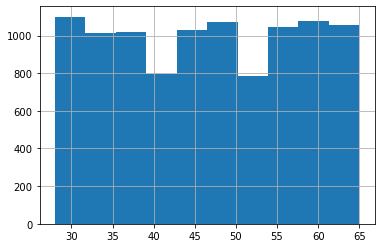

In [93]:
df1['Age'].hist()

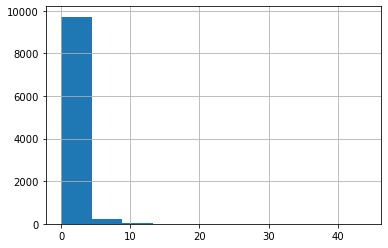

In [94]:
df1['score'].hist()

In [95]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
#using label encoder for these two columns as there is a lot of variables
df1['cat_Bank'] = labelencoder.fit_transform(df1['Bank']) # using label encoder on continent
df1['cat_City'] = labelencoder.fit_transform(df1['City']) # using label encoder on industry group

In [96]:
df1.drop(columns=['Bank', 'City'], inplace = True)

In [97]:
df1.columns

Index(['Customer ID', 'Pending amount', 'Repayed', 'Gender', 'State',
       'Default', 'Purchase Channel', 'Age', 'Insurance', 'Loan', 'Savings',
       'FD', 'DMAT', 'Card Type', 'score', 'cat_Bank', 'cat_City'],
      dtype='object')

In [177]:
df1.groupby('Default').mean().T

Default,0,1
Customer ID,4.416171e+08,4.379113e+08
Pending amount,4.973402e+05,5.028272e+05
Repayed,5.094228e+05,5.049525e+05
Gender,4.976096e-01,4.897549e-01
State,1.015737e+00,1.004018e+00
Purchase Channel,1.985657e+00,1.975894e+00
Age,4.639781e+01,4.667758e+01
Insurance,5.045817e-01,4.911611e-01
Loan,5.024435e+05,4.934113e+05
Savings,4.991628e+05,5.003914e+05


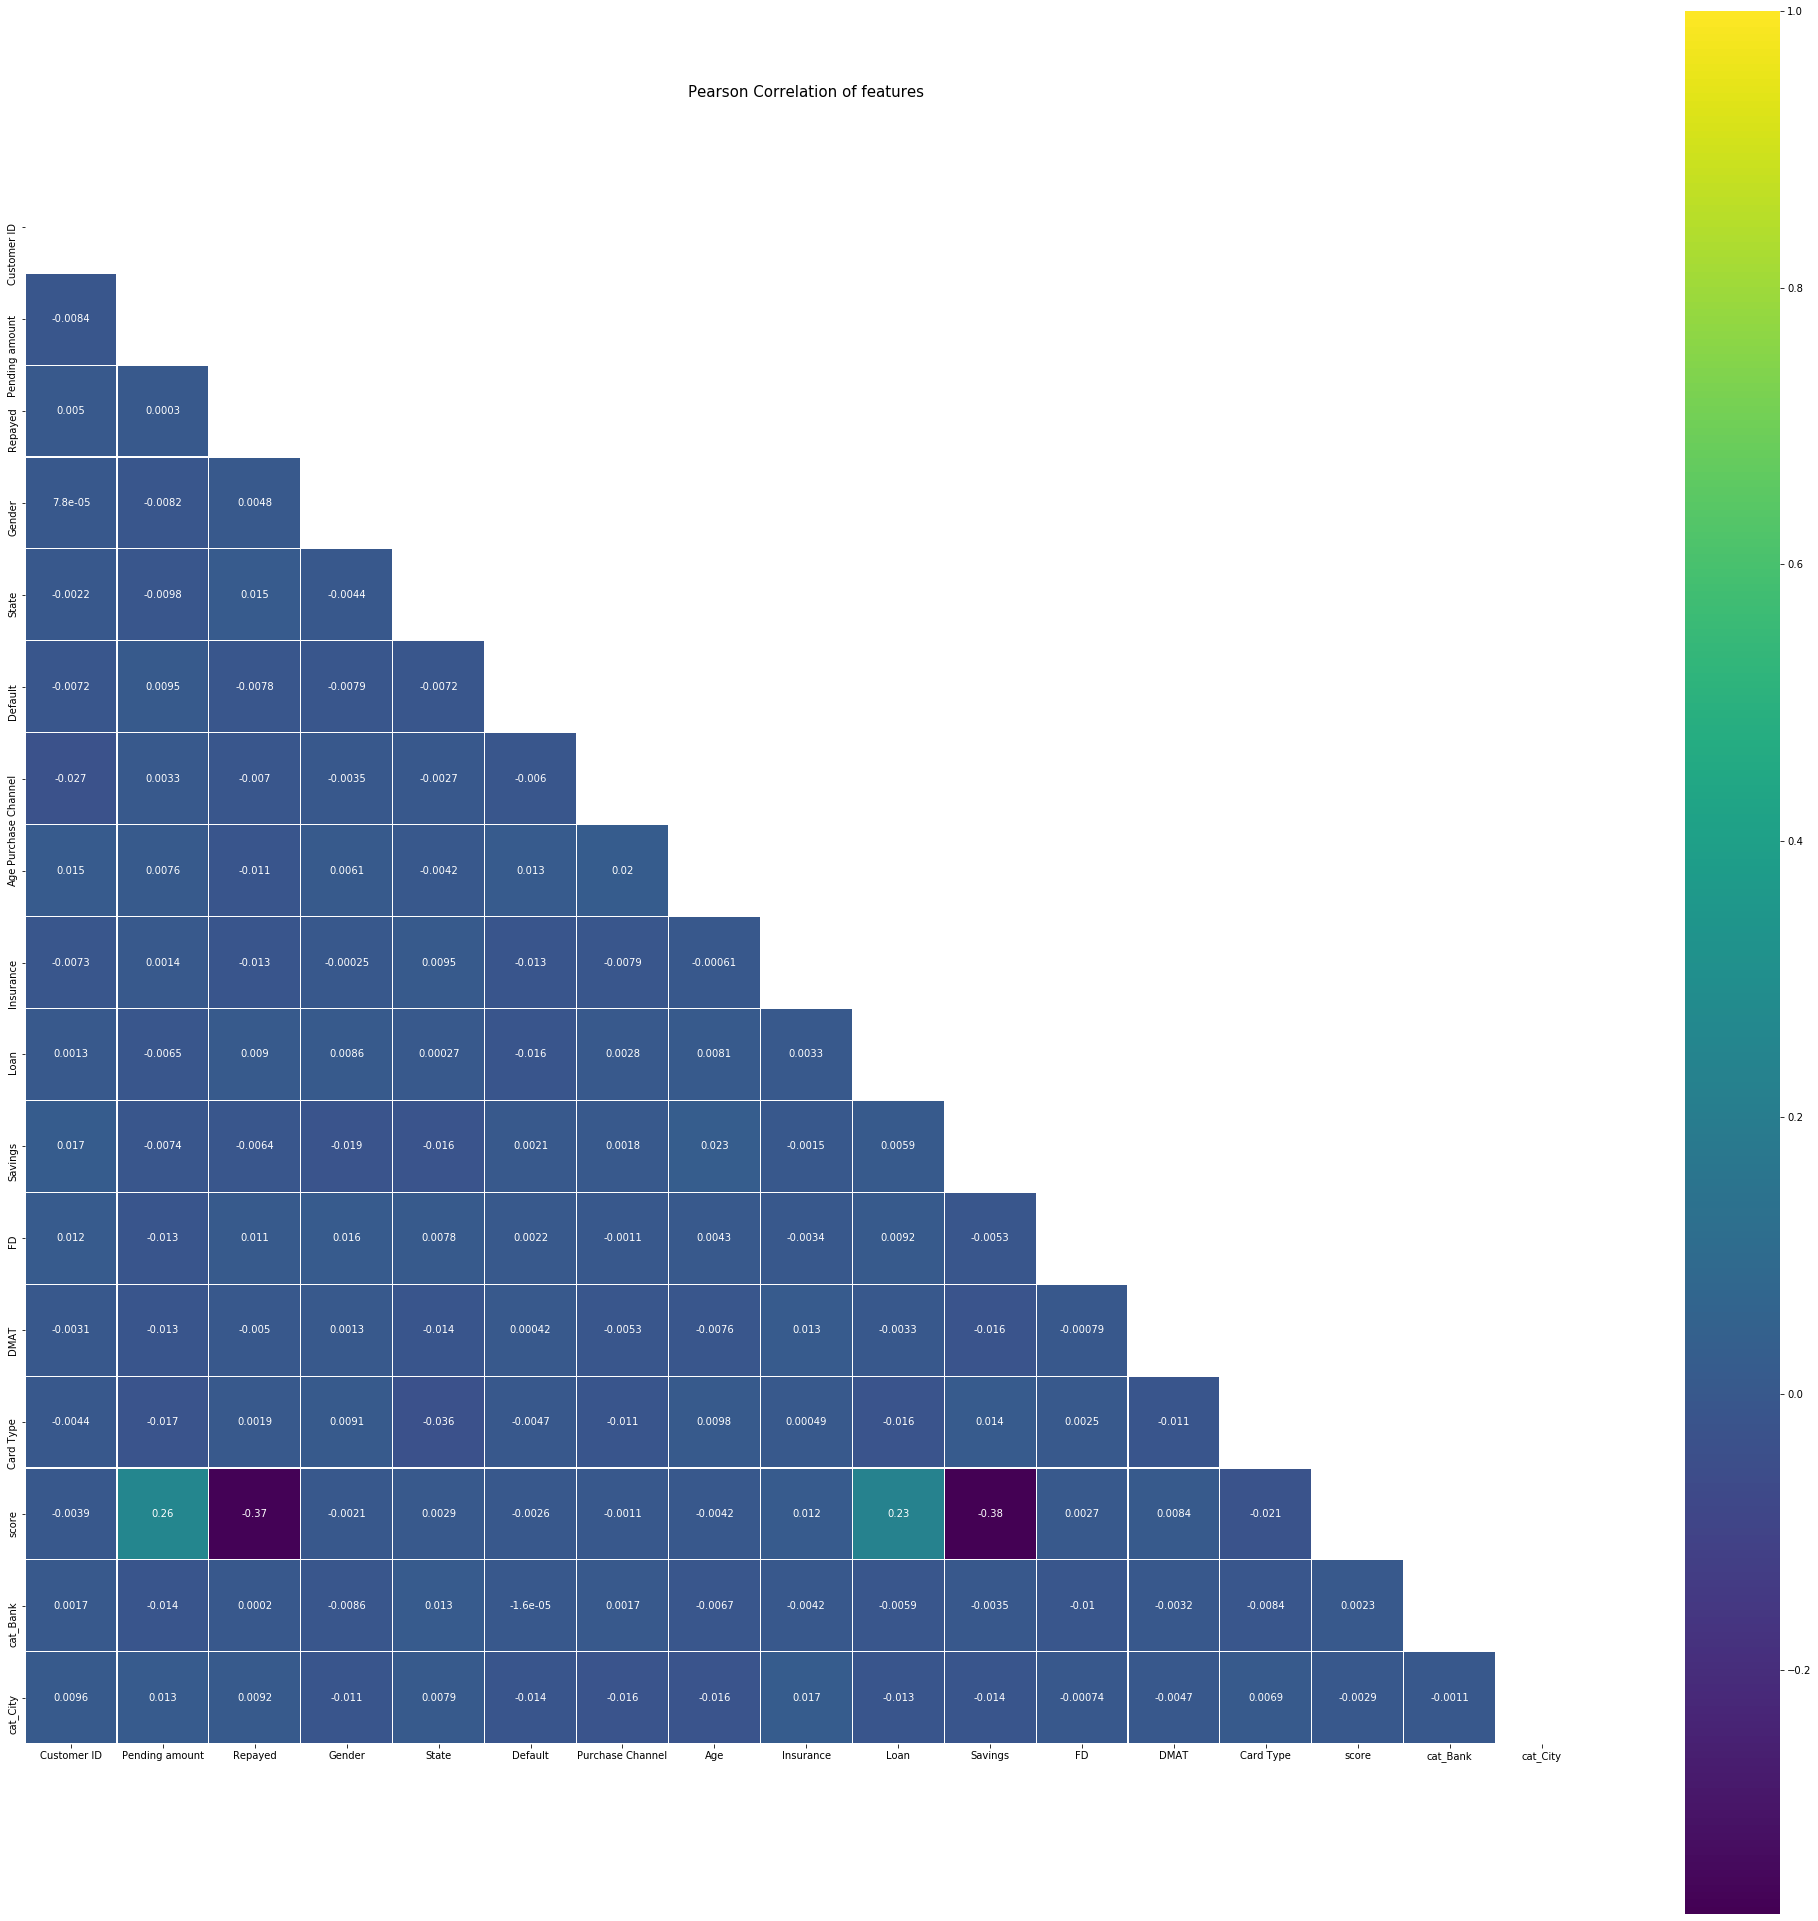

In [178]:
#creating correlation matrix
colormap = plt.cm.viridis
plt.figure(figsize = (35, 35))
plt.title('Pearson Correlation of features', y = 1.05, size = 15)
matrix = np.triu(df1.corr())
sns.heatmap(df1.astype(float).corr(), linewidth = 0.1, vmax = 1.0, square =True, cmap=colormap, linecolor = 'white', annot=True, mask = matrix)


### The new variable score which is calculated using pending amount, repayed amount, loan and savings of the individual these ae highly correlated. Hence droping thses variables to include the new score

In [179]:
#category bank also has a very less corelation 
df2 = df1.drop(columns = ['Pending amount', 'Loan', 'Savings', 'Repayed', 'cat_Bank', 'Customer ID'])

In [180]:
df2.columns

Index(['Gender', 'State', 'Default', 'Purchase Channel', 'Age', 'Insurance',
       'FD', 'DMAT', 'Card Type', 'score', 'cat_City'],
      dtype='object')

# Logistic Regression

In [181]:
Y_1 = df2.Default
X_1 = df2.drop('Default', axis = 1) #setting features

In [182]:
print(X_1.shape)
print(Y_1.shape)

(9998, 10)
(9998,)


In [183]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from IPython.display import display

In [184]:
parameters = {'C': [0.1, 1, 10], 'max_iter': [500, 1000], 'solver': ['lbfgs', 'liblinear']}

In [185]:
X_1, X_test, Y_1, Y_test = train_test_split(X_1, Y_1, test_size=0.2, shuffle=True, stratify=Y_1)
print('{:d} samples for train/val, {:d} samples for testing.'.format(len(X_1), len(X_test)))

lr = GridSearchCV(LogisticRegression(), param_grid=parameters, cv=10, scoring='accuracy', n_jobs=max(1, cpn_cnt-1))
lr.fit(X_1, Y_1)
display(lr.cv_results_)

7998 samples for train/val, 2000 samples for testing.


{'mean_fit_time': array([0.05538189, 0.03252828, 0.04788988, 0.03590477, 0.047052  ,
        0.02895963, 0.05070536, 0.03269305, 0.04711192, 0.03398271,
        0.04947331, 0.03063672]),
 'std_fit_time': array([0.0130303 , 0.00624327, 0.00551957, 0.00450133, 0.01994203,
        0.00582882, 0.02203191, 0.00981953, 0.01841447, 0.00656981,
        0.01761045, 0.01044294]),
 'mean_score_time': array([0.00244181, 0.00215931, 0.00256636, 0.00202887, 0.00210025,
        0.00205774, 0.00200408, 0.00224037, 0.00229537, 0.00214016,
        0.00227673, 0.0019383 ]),
 'std_score_time': array([6.39943217e-04, 3.64839057e-04, 1.19504840e-03, 5.72674817e-04,
        3.00684291e-04, 4.88209496e-04, 4.87220486e-06, 5.96834423e-04,
        5.07126364e-04, 2.98149163e-04, 4.75680415e-04, 7.14409358e-04]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 0.1, 1, 1, 1, 1, 10, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False

In [186]:
print('Testing set performance: ')
preds = lr.predict(X_test) # prediction
acc = accuracy_score(Y_test, preds) # evaluations
precision = precision_score(Y_test, preds)
recall = recall_score(Y_test, preds)
f1 = f1_score(Y_test, preds)
print('acc: {:.2f}, precision: {:.2f}, recall: {:.2f}, f1: {:.2f}'.format(acc, precision, recall, f1))

Testing set performance: 
acc: 0.51, precision: 0.51, recall: 0.47, f1: 0.49


In [192]:
best_lr = lr.best_estimator_
W_inspect = np.append(best_lr.coef_.flatten(), best_lr.intercept_.flatten(), axis=-1) # Check weights of perceptron to acquire knowledge of dating? ;)
features_key = np.array(list(df2.iloc[:, 1:]) + ['w0 (+1)'])
order = np.argsort(-W_inspect)
weights, keys = W_inspect[order], features_key[order]
for w, k in zip(weights, keys):
    print('{:>10}: {:.4f}'.format(k, w))

        FD: 0.0392
     score: 0.0060
       Age: 0.0022
Purchase Channel: 0.0011
   Default: -0.0069
      DMAT: -0.0073
 Card Type: -0.0234
  cat_City: -0.0292
   w0 (+1): -0.0353
 Insurance: -0.0355
     State: -0.0463


# Random Forest 

In [121]:
#using df1
df1.head()

,Customer ID,Pending amount,Repayed,Gender,State,Default,Purchase Channel,Age,Insurance,Loan,Savings,FD,DMAT,Card Type,score,cat_Bank,cat_City
0,546301568,582993,420324.0,1,0,1,3,59.0,1,663918,216348,0,1,0,1.958483,1,1
1,18658241,760344,708671.0,1,0,1,1,59.0,1,107236,439609,1,0,0,0.755547,2,2
2,545307255,433971,835055.0,0,2,0,1,35.0,0,745659,415287,1,0,1,0.943446,2,1
3,685777392,945476,759583.0,0,1,1,2,38.0,0,24216,284974,0,0,0,0.928328,2,3
4,838154128,874825,71394.0,1,2,1,3,50.0,0,794057,18748,1,1,1,18.513922,2,3


In [122]:
#based on previous analysis
df3 = df1.drop(columns=['cat_Bank', 'Customer ID', 'score'])

In [123]:
df3.columns

Index(['Pending amount', 'Repayed', 'Gender', 'State', 'Default',
       'Purchase Channel', 'Age', 'Insurance', 'Loan', 'Savings', 'FD', 'DMAT',
       'Card Type', 'cat_City'],
      dtype='object')

In [124]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Pending amount,9998.0,500072.188538,290067.802298,29.0,243944.25,501298.0,750867.00,999874.0
Repayed,9998.0,507197.029106,285661.194758,10014.0,259971.75,506023.0,757656.75,999946.0
Gender,9998.0,0.493699,0.499985,0.0,0.00,0.0,1.00,1.0
State,9998.0,1.009902,0.816089,0.0,0.00,1.0,2.00,2.0
Default,9998.0,0.497900,0.500021,0.0,0.00,0.0,1.00,1.0
Purchase Channel,9998.0,1.980796,0.815862,1.0,1.00,2.0,3.00,3.0
Age,9998.0,46.537107,11.008494,28.0,37.00,47.0,56.00,65.0
Insurance,9998.0,0.497900,0.500021,0.0,0.00,0.0,1.00,1.0
Loan,9998.0,497946.375575,288375.525101,4.0,247224.25,498516.0,746154.50,999915.0
Savings,9998.0,499774.504201,289170.685108,24.0,250026.75,496520.0,749229.00,999915.0


In [125]:
Y_2 = df3.Default
X_2 = df3.drop('Default', axis = 1) #setting features
X_train, X_test, Y_train, Y_test = train_test_split(X_2, Y_2, test_size = 0.2, random_state = 42)# test and train dataset

In [126]:
Y_2.value_counts()

0    5020
1    4978
Name: Default, dtype: int64

In [128]:
rfc = RandomForestClassifier(n_estimators = 10, random_state = 42)
rfc.fit(X_train, Y_train)#training the model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [129]:
rfc_pred_test = rfc.predict(X_test)
print(classification_report(Y_test, rfc_pred_test, target_names=['Class 1', 'Class 2'])) # model is overfitting for class2 and bad at fitting 1 and 3

              precision    recall  f1-score   support

     Class 1       0.50      0.61      0.54       995
     Class 2       0.50      0.39      0.44      1005

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.50      0.50      0.49      2000



#### Creating bins for the numerical columns

In [130]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Pending amount,9998.0,500072.188538,290067.802298,29.0,243944.25,501298.0,750867.00,999874.0
Repayed,9998.0,507197.029106,285661.194758,10014.0,259971.75,506023.0,757656.75,999946.0
Gender,9998.0,0.493699,0.499985,0.0,0.00,0.0,1.00,1.0
State,9998.0,1.009902,0.816089,0.0,0.00,1.0,2.00,2.0
Default,9998.0,0.497900,0.500021,0.0,0.00,0.0,1.00,1.0
Purchase Channel,9998.0,1.980796,0.815862,1.0,1.00,2.0,3.00,3.0
Age,9998.0,46.537107,11.008494,28.0,37.00,47.0,56.00,65.0
Insurance,9998.0,0.497900,0.500021,0.0,0.00,0.0,1.00,1.0
Loan,9998.0,497946.375575,288375.525101,4.0,247224.25,498516.0,746154.50,999915.0
Savings,9998.0,499774.504201,289170.685108,24.0,250026.75,496520.0,749229.00,999915.0


In [134]:
df3 = df3.rename(columns={'Pending amount': "Pending_amount"})

In [136]:
df3.columns

Index(['Pending_amount', 'Repayed', 'Gender', 'State', 'Default',
       'Purchase Channel', 'Age', 'Insurance', 'Loan', 'Savings', 'FD', 'DMAT',
       'Card Type', 'cat_City'],
      dtype='object')

In [153]:
df4 = df3.copy()

In [154]:
cat_amount = pd.cut(df3.Pending_amount, bins = [-1, 243947, 501300, 750870, 999875], labels=['low','low_medium','high_medium','high'])
df4.insert(0,'cat_amount',cat_amount)

In [155]:
cat_repayed = pd.cut(df3.Repayed, bins = [-1, 259972, 506023.0, 757657, 999946], labels=['low','low_medium','high_medium','high'])
df4.insert(0,'cat_repayed',cat_repayed)

In [156]:
cat_loan = pd.cut(df3.Repayed, bins = [-1, 247225, 498517, 746155, 999915], labels=['low','low_medium','high_medium','high'])
df4.insert(0,'cat_loan',cat_loan)

In [157]:
cat_savings = pd.cut(df3.Savings, bins = [-1, 250027, 496520, 749230, 999915], labels=['low','low_medium','high_medium','high'])
df4.insert(0,'cat_savings',cat_savings)

In [158]:
df4['cat_amount'] = df4['cat_amount'].replace(['low','low_medium','high_medium','high'], [0, 1, 2,3])
df4['cat_repayed'] = df4['cat_repayed'].replace(['low','low_medium','high_medium','high'], [0, 1, 2,3])
df4['cat_loan'] = df4['cat_loan'].replace(['low','low_medium','high_medium','high'], [0, 1, 2,3])
df4['cat_savings'] = df4['cat_savings'].replace(['low','low_medium','high_medium','high'], [0, 1, 2,3])

In [159]:
df4.drop(columns= ['Pending_amount','Repayed','Loan', 'Savings'  ], inplace = True)

In [160]:
df4.columns

Index(['cat_savings', 'cat_loan', 'cat_repayed', 'cat_amount', 'Gender',
       'State', 'Default', 'Purchase Channel', 'Age', 'Insurance', 'FD',
       'DMAT', 'Card Type', 'cat_City'],
      dtype='object')

In [161]:
df4.head()

,cat_savings,cat_loan,cat_repayed,cat_amount,Gender,State,Default,Purchase Channel,Age,Insurance,FD,DMAT,Card Type,cat_City
0,0,1.0,1,2,1,0,1,3,59.0,1,0,1,0,1
1,1,2.0,2,3,1,0,1,1,59.0,1,1,0,0,2
2,1,3.0,3,1,0,2,0,1,35.0,0,1,0,1,1
3,1,3.0,3,3,0,1,1,2,38.0,0,0,0,0,3
4,0,0.0,0,3,1,2,1,3,50.0,0,1,1,1,3


In [170]:
df4.isna().sum()

cat_savings         0
cat_loan            1
cat_repayed         0
cat_amount          0
Gender              0
State               0
Default             0
Purchase Channel    0
Age                 0
Insurance           0
FD                  0
DMAT                0
Card Type           0
cat_City            0
dtype: int64

In [171]:
df4.dropna(how='any', inplace = True)

In [172]:
df4.shape

(9997, 14)

In [173]:
Y_3 = df4.Default
X_3 = df4.drop('Default', axis = 1) #setting features
X_train, X_test, Y_train, Y_test = train_test_split(X_3, Y_3, test_size = 0.2, random_state = 42)# test and train dataset

In [174]:
Y_3.value_counts()

0    5019
1    4978
Name: Default, dtype: int64

In [175]:
rfc = RandomForestClassifier(n_estimators = 10, random_state = 42)
rfc.fit(X_train, Y_train)#training the model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [176]:
rfc_pred_test = rfc.predict(X_test)
print(classification_report(Y_test, rfc_pred_test, target_names=['Class 1', 'Class 2'])) # model is overfitting for class2 and bad at fitting 1 and 3

              precision    recall  f1-score   support

     Class 1       0.50      0.62      0.55       997
     Class 2       0.50      0.38      0.43      1003

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.50      0.50      0.49      2000



### with introducing categorical variables in the random forest classifier instead of numerical the recall and f1-score is increasing by 0.1 

In [187]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)
feature_list = list(X_3.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Age                  Importance: 0.25
Variable: cat_amount           Importance: 0.1
Variable: cat_City             Importance: 0.1
Variable: cat_savings          Importance: 0.09
Variable: State                Importance: 0.07
Variable: Purchase Channel     Importance: 0.07
Variable: cat_loan             Importance: 0.05
Variable: cat_repayed          Importance: 0.05
Variable: DMAT                 Importance: 0.05
Variable: Gender               Importance: 0.04
Variable: Insurance            Importance: 0.04
Variable: FD                   Importance: 0.04
Variable: Card Type            Importance: 0.04


In [188]:
df5 = df4.drop(columns = ['Gender', 'Insurance', 'FD', 'Card Type'])

In [189]:
Y_3 = df5.Default
X_3 = df5.drop('Default', axis = 1) #setting features
X_train, X_test, Y_train, Y_test = train_test_split(X_3, Y_3, test_size = 0.2, random_state = 42)# test and train dataset

In [190]:
rfc = RandomForestClassifier(n_estimators = 10, random_state = 42)
rfc.fit(X_train, Y_train)#training the model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [191]:
rfc_pred_test = rfc.predict(X_test)
print(classification_report(Y_test, rfc_pred_test, target_names=['Class 1', 'Class 2'])) # model is overfitting for class2 and bad at fitting 1 and 3

              precision    recall  f1-score   support

     Class 1       0.49      0.59      0.54       997
     Class 2       0.49      0.39      0.43      1003

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.48      2000
weighted avg       0.49      0.49      0.48      2000

